# Big Data Analysis 2
### Exercise: Data Clustering with K-means 1

Let's try K-means klustering with PING data to get familiar to klustering methods. In this exercise we use same google_ping.txt data as in BDA1 course. 

***Hint.*** Check this first:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Step 1: Preprosess the data and read it to Pandas dataframe 
**Task 1.** Copy `/bda1/data/google_ping.txt` to your working file

**Task 2.** Remove duplicate lines (indicated with DUP)

**Task 3.** Replace timeout lines with NaN (`Request timeout for icmp_seq xxx`)

**Task 4.** Remove first header line (`PING google.com (74.125.205.138): 56 data bytes`)

**Task 5.** Remove PING statistics from the end 
```
--- google.com ping statistics ---
94 packets transmitted, 94 packets received, 0.0% packet loss
round-trip min/avg/max/stddev = 21.390/44.664/153.979/40.020 ms
````
**Task 6.** Remove all other characters except ping times from ping rows

----------
**Task 7.** Import pandas as pd, numpy as np, matplotlib.pyplot as plt, from sklearn.cluster import KMeans, from sklearn.metrics import silhouette_samples, silhouette_score and inline %matplotlib.

------

**Task 8.** Read ping times and NaNs to pandas dataframe `google` with column label `ping`.

**Task 9.** Use `plot()` and `hist(bins=50)` to visualize `google` data.

**Task 10.** Print dataframe length.

**Task 11.** Print dataframe statistics with `describe()`. 


In [76]:
## Task 1-6
## Your code here

!cp ../data/google_ping.txt google_ping.txt

dup = 'DUP'

a_file = open("google_ping.txt", "r")
lines = a_file.readlines()
a_file.close()

new_file = open("google_ping2.txt", "w")
for line in lines:
    if not(dup in line):
        new_file.write(line)
new_file.close()

!sed -i -e 's/Request timeout for icmp_seq.*/NaN/g' google_ping2.txt
!sed -i '1d' google_ping2.txt
!sed -i "$(( $(wc -l < google_ping2.txt)-3 )),$ d" google_ping2.txt
!sed -i 's/.*time=\(.*\) ms/\1/g' google_ping2.txt

In [77]:
## Task 7
## Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

95


,ping
count,94.000000
mean,44.663734
std,40.234384
min,21.390000
25%,23.411750
50%,24.754500
75%,37.386000
max,153.979000


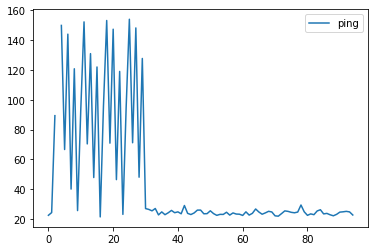

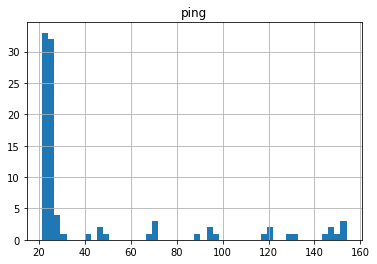

In [78]:
## Task 8-11
## Your code here

ping_data = !cat google_ping2.txt
ping_list = list(np.float_(ping_data))
google = pd.DataFrame(ping_list, columns=['ping'])

google.plot() 
google.hist(bins=50)

print(len(google))
google.describe()

### Step 2: K-means
**Task 12.** Setup KMeans with 2 clusters

**Task 13.** fit Kmeans (***hint.*** *Drop nan values before fit.*)

**Task 14.** Plot data clusters as a scatter plot and include cluster_center lines.

**Task 15.** Print and save Kmeans cluster_centers to variable `centroids1`.


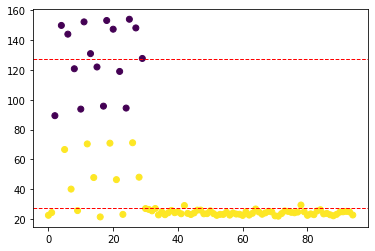

[[127.6235    ]
 [ 27.64634615]]


In [63]:
## Task 12-15
## Your code here

google.dropna(inplace=True)

kmeans = KMeans(n_clusters=2)
kmeans.fit(google)

plt.scatter(google.index, google['ping'], c=kmeans.labels_)
centroids1 = kmeans.cluster_centers_

plt.axhline(centroids1[1], color='r', linestyle='dashed', linewidth=1)
plt.axhline(centroids1[0], color='r', linestyle='dashed', linewidth=1)

plt.show()
print(centroids1)

You should get something like this:

<img src="./bda2_kmeans_answers/kmeans1.png" width=300px/>

### Step 3: K-means with index values
As we see, here clustering is done only with y-axis values. Let's see what happens, if we add indexes to clustering.

**Task 16.** Add new column `i` to google dataframe and fill it with indexes 0...94

**Task 17.** Repeat steps 12-14. (***Note.*** *Here we are clustering x,y pairs, not just 1 value.*)

**Task 18.** Print and save Kmeans cluster_centers to variable `centroids2`.


[[ 25.37106757  56.06756757]
 [116.0466      15.65      ]]


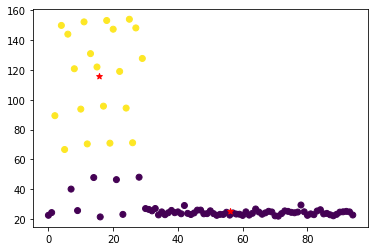

In [74]:
## Task 16-17
## Your code here

google.dropna(inplace=True)
google['i'] = google.index.values

kmeans = KMeans(n_clusters=2)
kmeans.fit(google)

plt.scatter(google['i'], google['ping'], c=kmeans.labels_) #
centroids2 = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='red', marker=('*'));

print(centroids2)

You should get something like this:

<img src="./bda2_kmeans_answers/kmeans2.png" width=300px/>

### Step 3: Little trick with rolling average
As we see, clustering still gives quite odd clusters. Let's try a little trick. Take a 10 number rolling average and calculate clusters ones more.  

**Task 18.** Add new column `i` to google dataframe and fill it with indexes 0...94

**Task 19.** Repeat steps 12-14 ones more.

**Task 20.** Print and save Kmeans cluster_centers to variable `centroids3`.


[[25.05892034 60.5       ]
 [88.12436522 19.5       ]]


,ping,i
13,99.4058,8.5
14,89.2029,9.5
15,94.7386,10.5
16,82.4797,11.5
17,88.0430,12.5
...,...,...
90,23.7743,85.5
91,23.9135,86.5
92,24.1358,87.5
93,24.0736,88.5


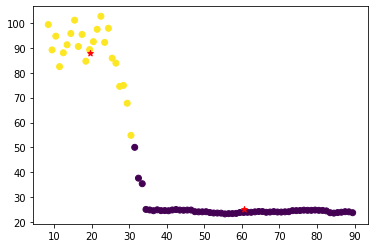

In [79]:
## Task 18-20
## Your code here
import numpy as np

google['i'] = np.arange(0, 95)
google = google.rolling(10).mean()
google.dropna(inplace=True)

kmeans = KMeans(n_clusters=2)
kmeans.fit(google)

plt.scatter(google['i'], google['ping'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='red', marker=('*'));

centroids3 = kmeans.cluster_centers_
print(centroids3)
google

You should get something like this:

<img src="./bda2_kmeans_answers/kmeans3.png" width=300px/>

### Reflection
Answer following questions:
1. Why clustering didn't find correct clusters at first?
2. Why clustering found correct clusters at the end?
3. Is K-means a good clustering method for this kind of data?

Luultavasti ei ole oikea metodi tällaiselle datalle. Mutta ei K-meansiä varmaan paljon yritetäkään tällaiselle datalle käyttää?

### Check your answers by running following cell:

In [80]:
# Do not change this code!

import importlib
import bda2_kmeans1_check
importlib.reload(bda2_kmeans1_check)

print("Results:")
correct = bda2_kmeans1_check.check_kmeans1(centroids1, centroids2, centroids3)
print("Correct answers", correct, "/ 3.")

Results:
	 'centroids1' is not correct. Please check your answer.
centroids1
 [[127.6235    ]
 [ 27.64634615]]
ref
 [[127.6235    ]
 [ 27.64634615]]
	 'centroids2' is not correct. Please check your answer.
centroids2
 [[ 25.37106757  56.06756757]
 [116.0466      15.65      ]]
ref
 [[ 56.06756757  25.37106757]
 [ 15.65       116.0466    ]]
	 'centroids3' is not correct. Please check your answer.
centroids3
 [[25.05892034 60.5       ]
 [88.12436522 19.5       ]]
ref
 [[60.5        25.05892034]
 [19.5        88.12436522]]
Correct answers 0 / 3.


### Nice work! 

In [ ]:
OISKOHAN TOI TARKISTIN RIKKI...?